In [49]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

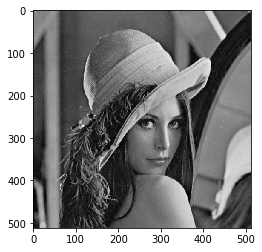

In [65]:
im = plt.imread('./lenaTest3.jpg')/256

plt.imsave('./lenaTestCopy.jpg', im, cmap='gray')

plt.imshow(im, cmap='gray', )

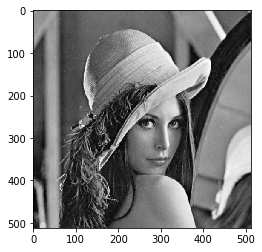

In [29]:
def Tnorm(img, a, b):
    return np.clip((img - a)/(b-a), 0, 1)

plt.imshow(Tnorm(im, 0, 0.9), cmap='gray')

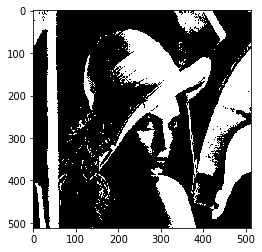

In [30]:
def Tthreshold(img, theta):
    return (img > theta).astype(np.int)

plt.imshow(Tthreshold(im, 0.5), cmap='gray')

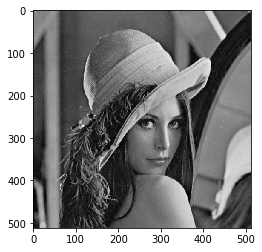

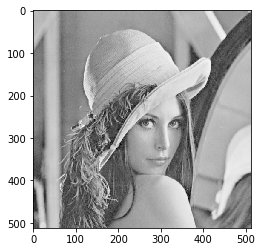

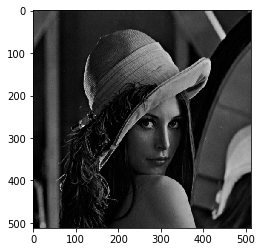

In [35]:
def Tgamma(img, gamma):
    return img**gamma

plt.imshow(im, cmap='gray')
plt.figure()
plt.imshow(Tgamma(im, 0.5), cmap='gray')
plt.figure()
plt.imshow(Tgamma(im, 2), cmap='gray')

0.38841560214173565


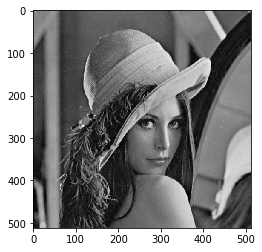

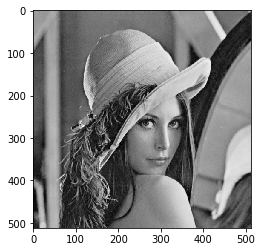

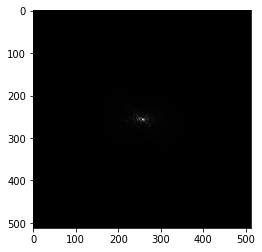

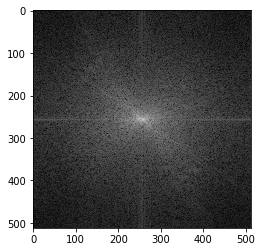

In [46]:
def Tlog(img):
    return np.log2(img+1)

plt.imshow(im, cmap='gray')
plt.figure()
plt.imshow(Tlog(im), cmap='gray')
# plt.figure()
# plt.imshow(im - Tlog(im), cmap='gray')

print(np.mean(im))
plt.figure()
plt.imshow(np.fft.fftshift(abs(np.fft.fft2(im - np.mean(im)))), cmap='gray')

im_trans = Tlog(im)
plt.figure()
plt.imshow(Tlog(np.fft.fftshift(abs(np.fft.fft2(im)))), cmap='gray')

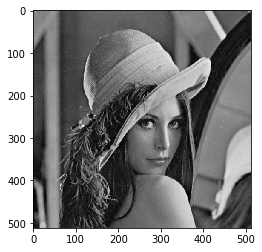

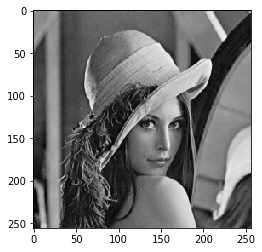

In [63]:
n = im.shape[0]
m = im.shape[1]

im2 = np.zeros(shape=[n//2, m//2])

for i in range(2, n, 2):
    for j in range(2, m, 2):
        im2[i//2, j//2] = np.mean(im[i-2:i, j-2:j])
        
plt.imshow(im, cmap='gray')
plt.figure()
plt.imshow(im2, cmap='gray')

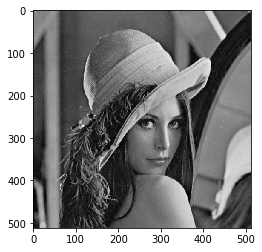

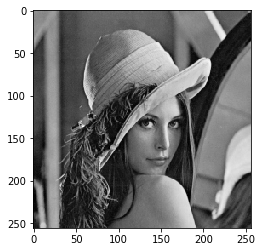

In [69]:
def strideConv(arr, arr2, s):
    return signal.convolve2d(arr, arr2[::-1, ::-1], mode='valid')[::s, ::s]

im3 = strideConv(im, np.ones(shape=(2,2))*0.25, 2)
plt.imshow(im, cmap='gray')
plt.figure()
plt.imshow(im3, cmap='gray')

In [ ]:
# import torch
# im_ten = torch.Tensor(im)